Importing Libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 125)
pd.set_option('display.max_rows', 200)

Read the datasets

In [3]:
app = pd.read_csv("application_data.csv")
pre_app = pd.read_csv("previous_application.csv")

In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app.shape

(307511, 122)

**Data cleaning**

In [6]:
# Percentage of null value in columns

app.isnull().sum()*100/len(app)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

 dropping the columns having more than 50% null values

In [7]:
app.columns[app.isnull().sum() > 50.0]

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGA

In [8]:
len(app.columns[app.isnull().sum() > 50.0])

64

In [9]:
app = app[ app.columns[app.isnull().sum() < 50.0] ]
app.shape


(307511, 58)

In [10]:
app.shape

(307511, 58)

In [11]:
# checking the percentage of null values in the remaining columns
app.isnull().sum()*100/len(app)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [12]:
# Removing all the columns which are not necessary for the analysis
unnecessary = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
app = app.drop(labels= unnecessary, axis=1)

In [13]:
# checking the final shape of the data set 
app.shape

(307511, 28)

In [14]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [15]:
# converting all the negative values to absolute values

app['DAYS_BIRTH'] = app['DAYS_BIRTH'].abs()
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].abs()
app['DAYS_REGISTRATION'] = app['DAYS_REGISTRATION'].abs()
app['DAYS_ID_PUBLISH'] = app['DAYS_ID_PUBLISH'].abs()

In [16]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [17]:
# Dividing the dataset into two datasets of traget_1(client with payment difficulties) and target_0(all others)

target_0 = app.loc[app['TARGET']==0]
target_1 = app.loc[app['TARGET']==1]

In [18]:
# calculating imbalace
round(len(target_0)/len(target_1),2)

11.39

**Analysis**

In [19]:
app.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

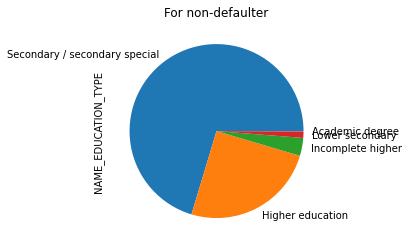

In [20]:
# plotting pie plot for NAME_EDUCATION_TYPE for target_0

target_0.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.pie()
plt.title('For non-defaulter')
plt.show()

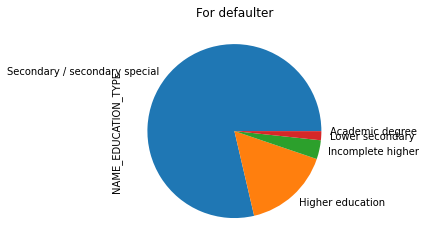

In [21]:
# plotting pie plot for NAME_EDUCATION_TYPE for target_1

target_1.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.pie()
plt.title('For defaulter')
plt.show()

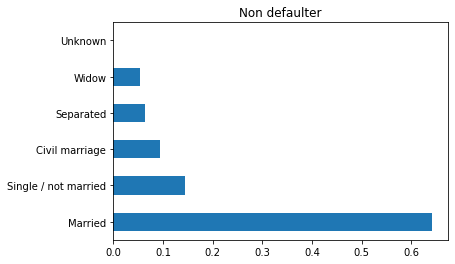

In [22]:
# plotting a bar plot for NAME_FAMILY_STATUS for target_0

target_0.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh()
plt.title('Non defaulter')
plt.show()

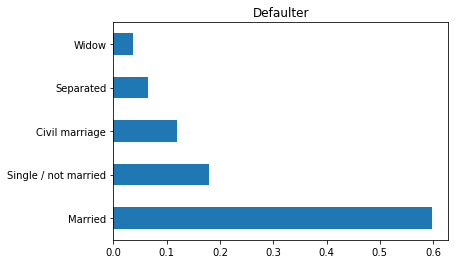

In [23]:
#plotting a bar plot for NAME_FAMILY_STATUS for target_1


target_1.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh()
plt.title('Defaulter')
plt.show()

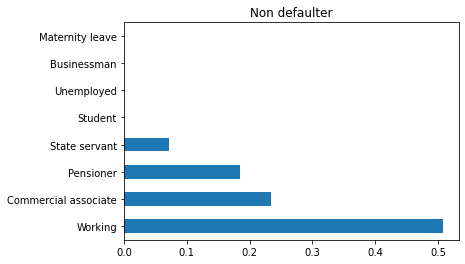

In [24]:
#plotting a bar plot for NAME_INCOME_TYPE for target_0


target_0.NAME_INCOME_TYPE.value_counts(normalize= True).plot.barh()
plt.title('Non defaulter')
plt.show()


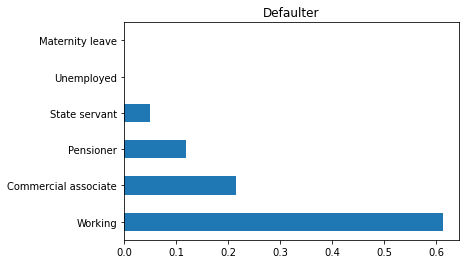

In [25]:
#plotting a bar plot for NAME_INCOME_TYPE for target_1

target_1.NAME_INCOME_TYPE.value_counts(normalize= True).plot.barh()
plt.title('Defaulter')
plt.show()


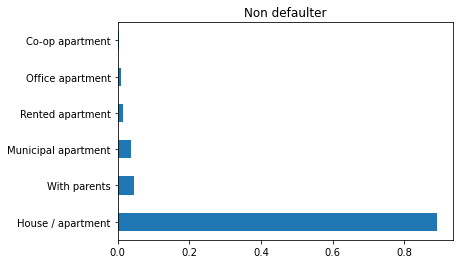

In [26]:
#plotting a bar plot for NAME_HOUSING_TYPE for target_0

target_0.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.barh()
plt.title('Non defaulter')
plt.show()

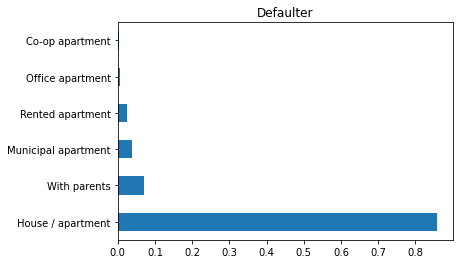

In [27]:
#plotting a bar plot for NAME_HOUSING_TYPE for target_1

target_1.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.barh()
plt.title('Defaulter')
plt.show()

In [28]:
app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [29]:
#Binning of AMT_INCOME_TOTAL

q1 = app['AMT_INCOME_TOTAL'].quantile(0.25)
q2 = app['AMT_INCOME_TOTAL'].quantile(0.50)
q3 = app['AMT_INCOME_TOTAL'].quantile(0.75)
q4 = app['AMT_INCOME_TOTAL'].max()

app['AMT_INCOME_TOTAL_Bin'] = pd.cut(app['AMT_INCOME_TOTAL'],[q1,q2,q3,q4], labels=['low', 'medium', 'high'])
print(app.AMT_INCOME_TOTAL_Bin.value_counts())

medium    82213
high      71538
low       53182
Name: AMT_INCOME_TOTAL_Bin, dtype: int64


In [30]:
app.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [31]:
#Binning of AMT_CREDIT

q1 = app['AMT_CREDIT'].quantile(0.25)
q2 = app['AMT_CREDIT'].quantile(0.50)
q3 = app['AMT_CREDIT'].quantile(0.75)
q4 = app['AMT_CREDIT'].max()

app['AMT_CREDIT_Bin'] = pd.cut(app['AMT_CREDIT'], [q1,q2,q3,q4], labels=['low', 'medium', 'high'])
print(app.AMT_CREDIT_Bin.value_counts())

medium    77786
high      75876
low       75428
Name: AMT_CREDIT_Bin, dtype: int64


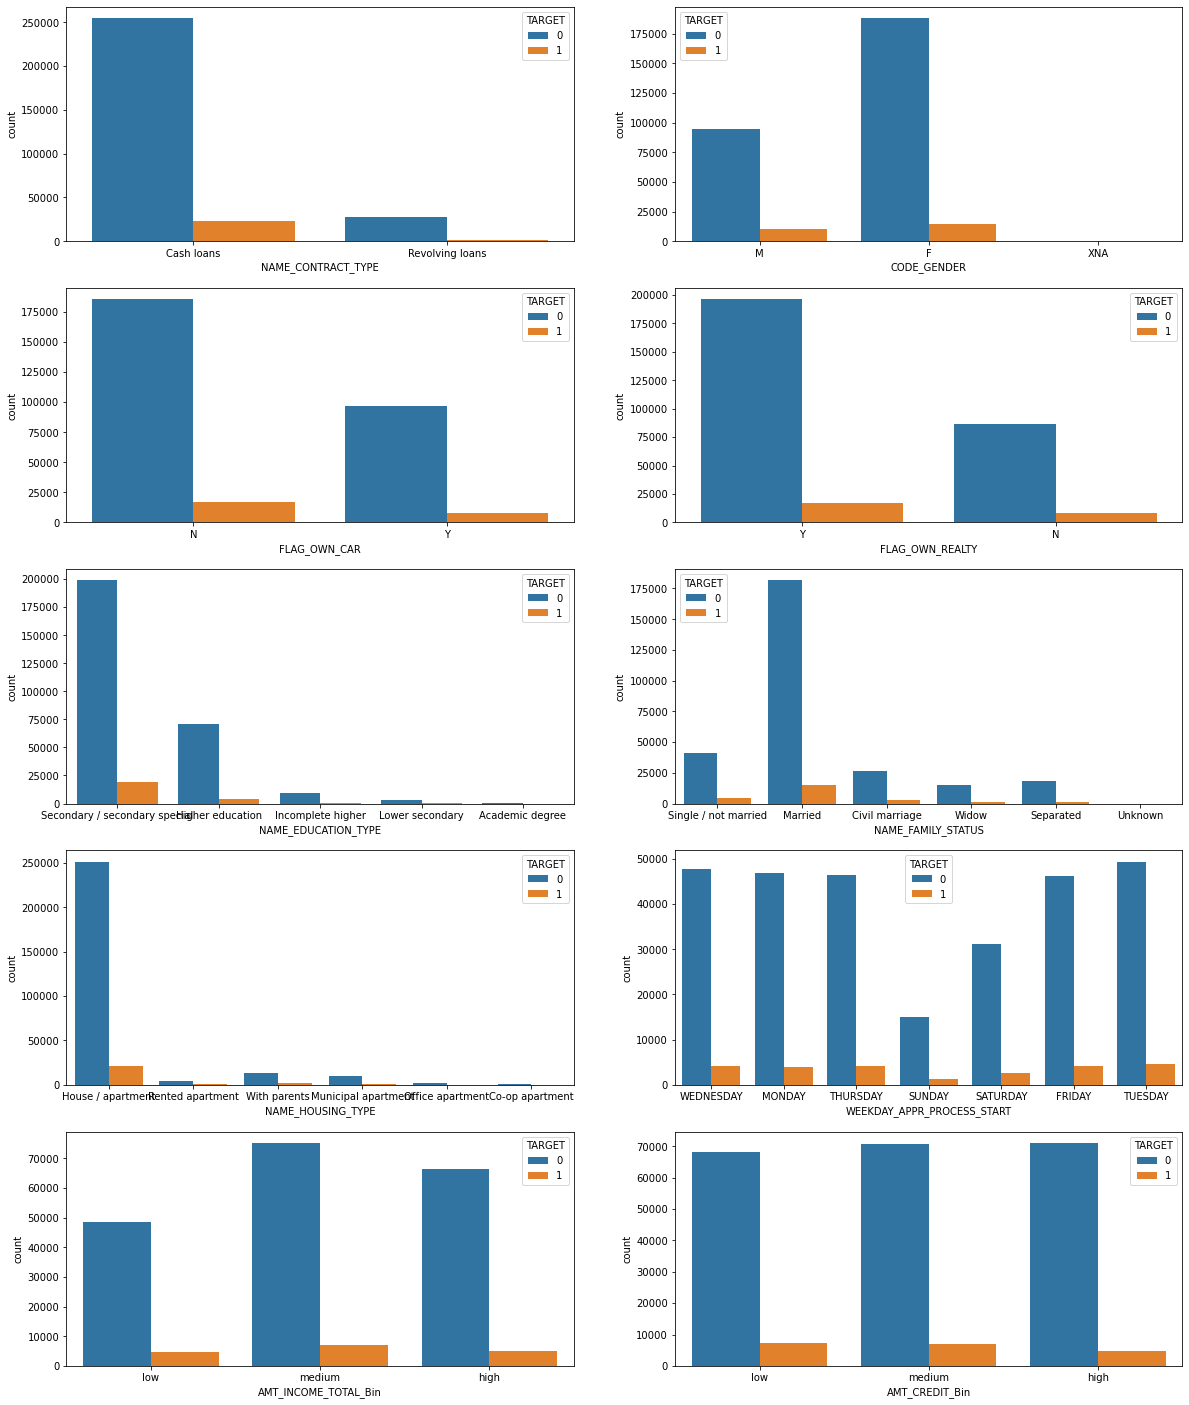

In [32]:
#comparing the target variable across categorical variables 


categorical = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'AMT_INCOME_TOTAL_Bin', 'AMT_CREDIT_Bin']

plt.figure(figsize = (20,25))
for i in (enumerate(categorical)):
    plt.subplot(len(categorical)//2,2,i[0]+1)
    sns.countplot(x=i[1], hue='TARGET', data=app)
  
    
plt.show()

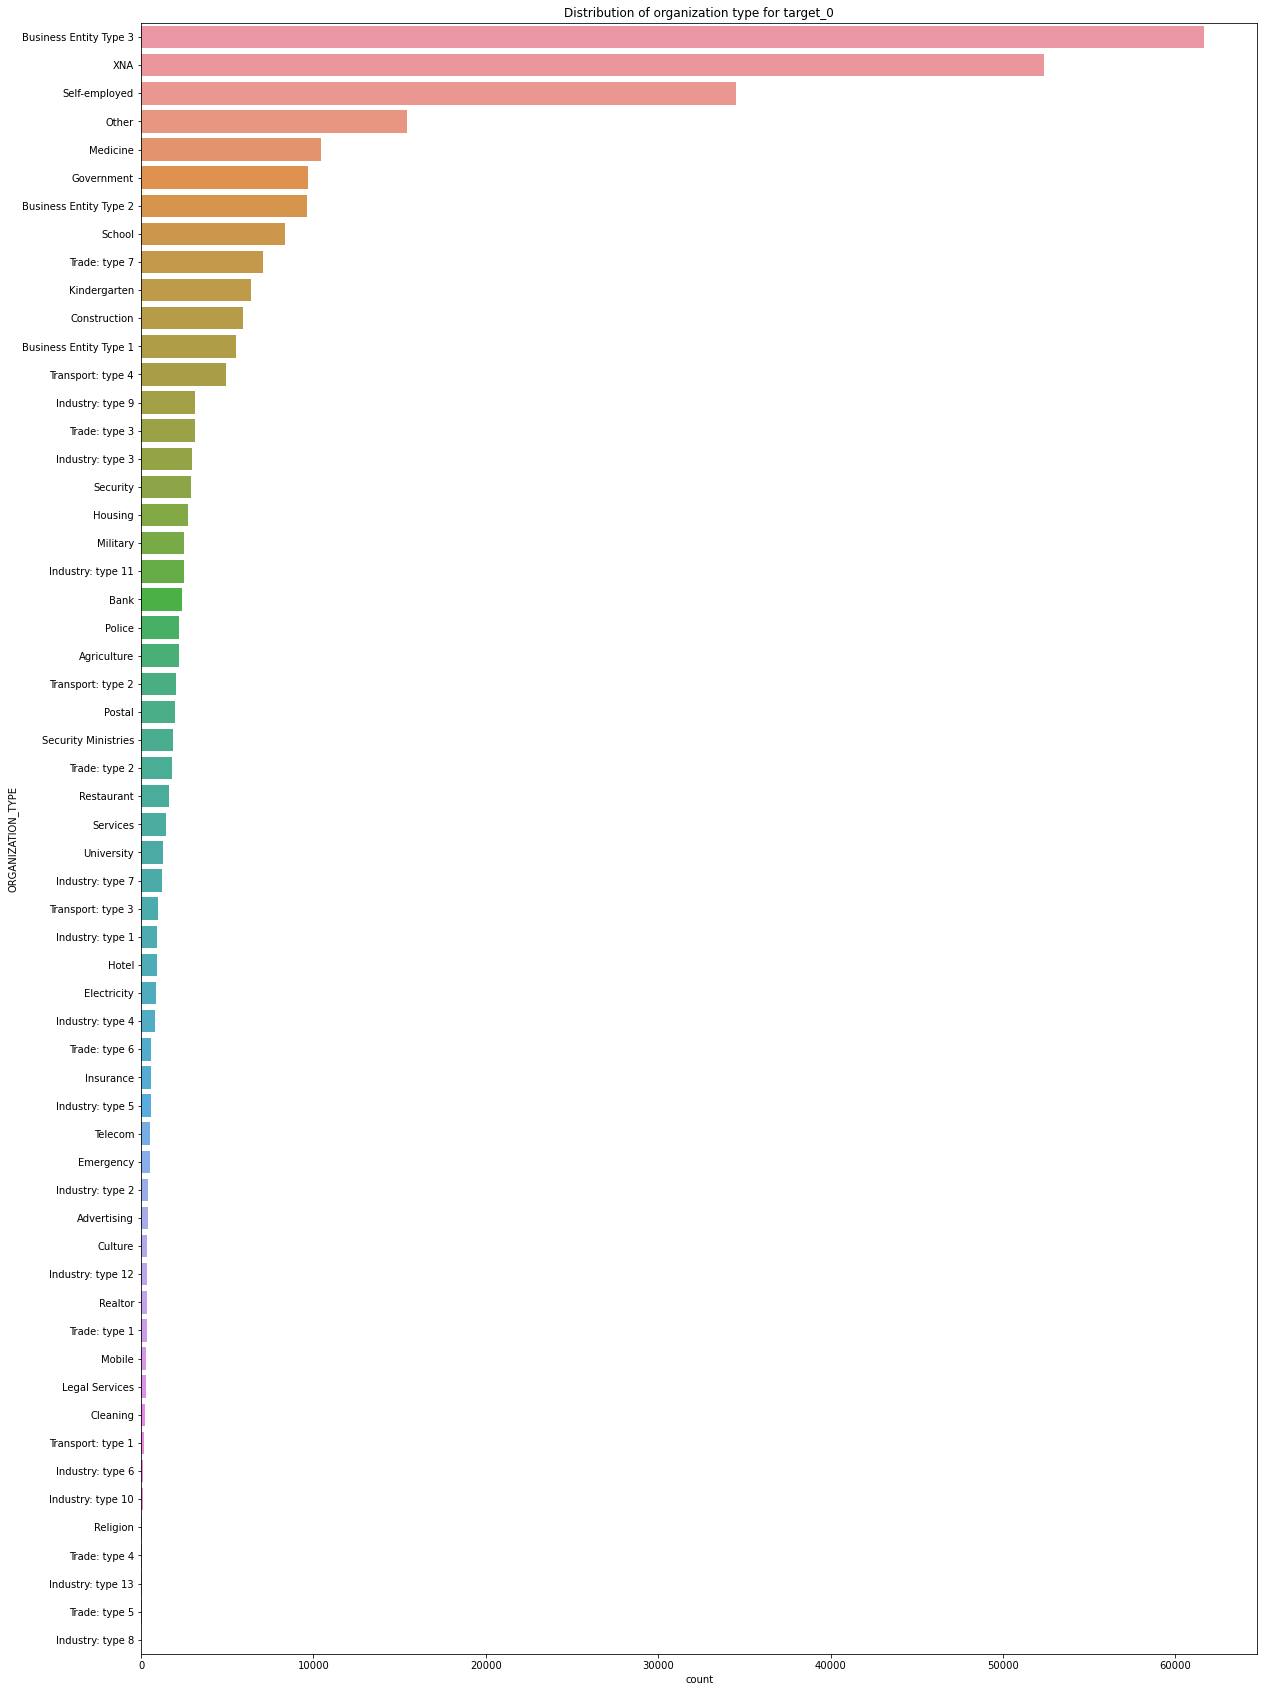

In [33]:
#Plotting for organization type for target_0

plt.figure(figsize=(20,30))
plt.title('Distribution of organization type for target_0')

sns.countplot(data= target_0, y='ORGANIZATION_TYPE', order=target_0['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

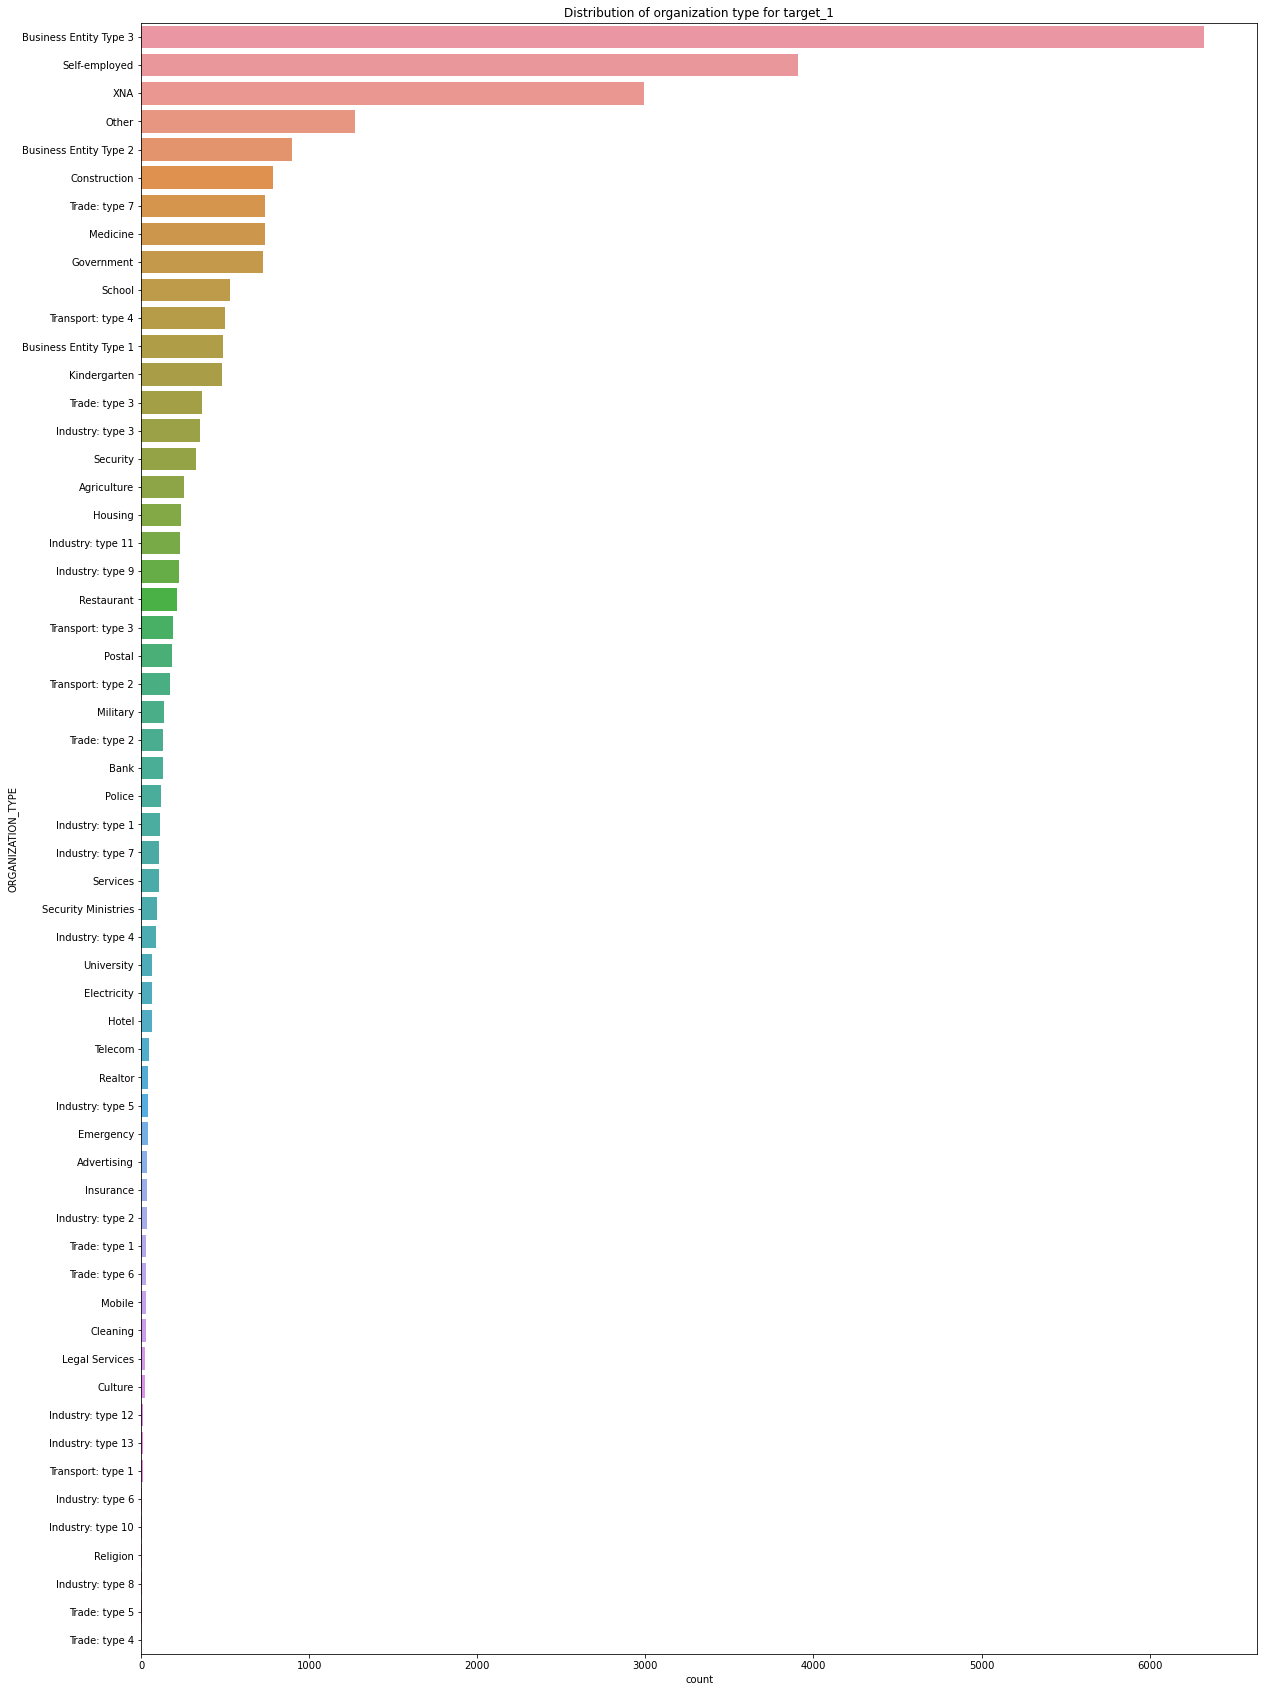

In [34]:
#Plotting for organization type for target_1


plt.figure(figsize=(20,30))
plt.title('Distribution of organization type for target_1')

sns.countplot(data= target_1, y='ORGANIZATION_TYPE', order=target_1['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

In [35]:
#Correlation for target_0

target_0= target_0.corr()
target_0

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,0.041992,0.080665,0.075487,-0.005675,0.001520,0.010582
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,1.000000,0.025244,-0.007198,0.052083,0.001071,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,-0.012263,0.025244,1.000000,0.626114,0.333151,0.271314,-0.095916,-0.066252,-0.097908,-0.071648,-0.179772,-0.241904,-0.160072
DAYS_EMPLOYED,0.001744,NaN,-0.245174,-0.140392,-0.070104,-0.104978,-0.007198,0.626114,1.000000,0.214511,0.276663,-0.095455,-0.037502,-0.111011,-0.098920,-0.092842,-0.258121,-0.221387
DAYS_REGISTRATION,0.001475,NaN,-0.185792,-0.064937,-0.013477,-0.039436,0.052083,0.333151,0.214511,1.000000,0.100236,0.008044,-0.028700,-0.037870,-0.028475,-0.064216,-0.098919,-0.072248


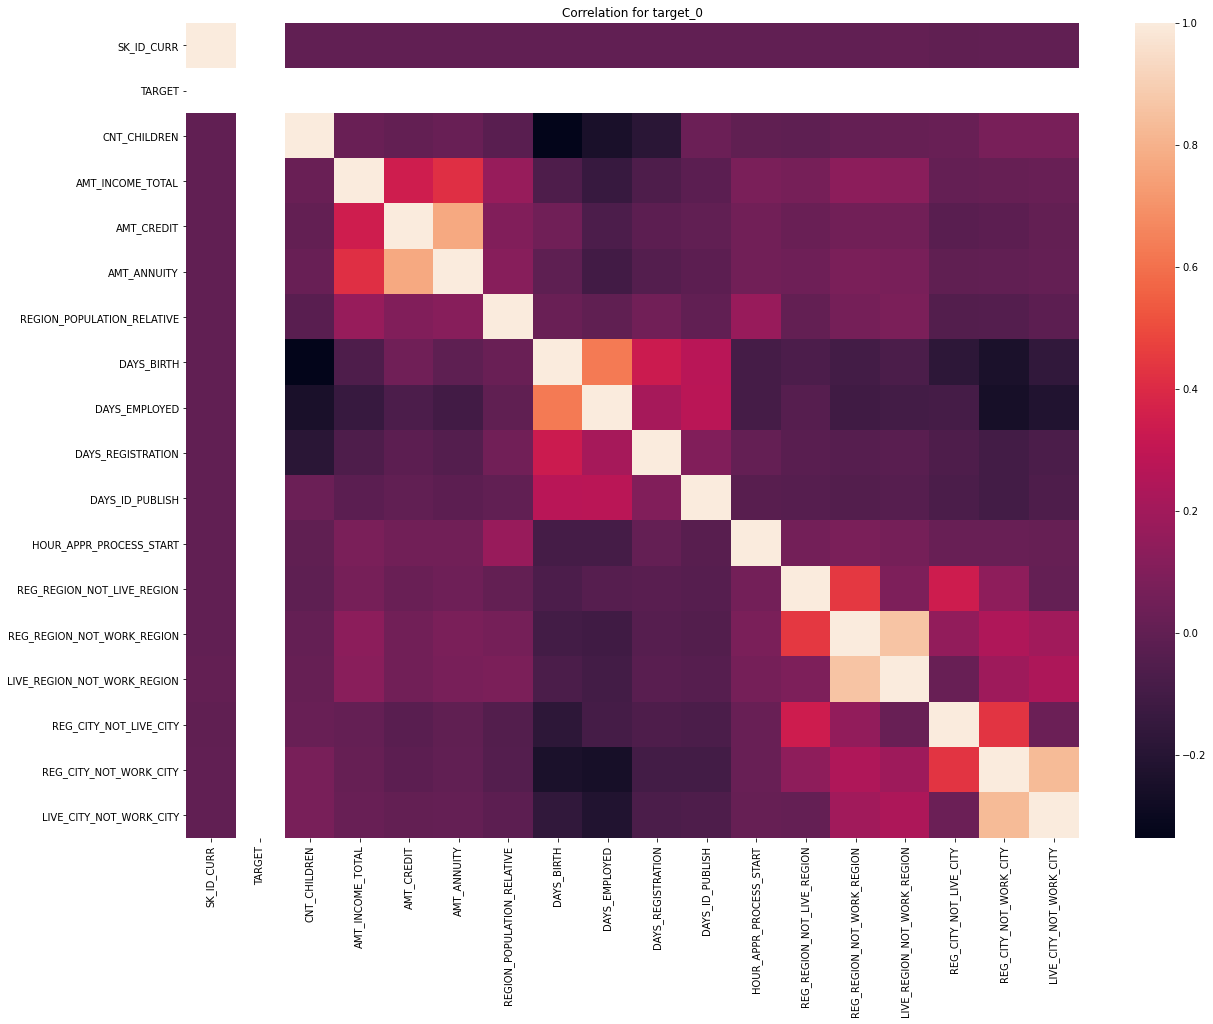

In [36]:
#Heatmap for target_0

plt.figure(figsize=(20,15))
plt.title('Correlation for target_0')

sns.heatmap(data=target_0)
plt.show()

In [37]:
#Correlation for target_1

target_1= target_1.corr()
target_1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,0.006301,0.001254,-0.005161,-0.006342,0.002539,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.031975,-0.259109,-0.192864,-0.149154,0.032299,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.009135,-0.003096,-0.014977,-0.000158,0.004215,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.069161,0.135316,0.001930,0.025854,0.052329,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509
AMT_ANNUITY,-0.007578,NaN,0.031257,0.046421,0.752195,1.000000,0.071690,0.014303,-0.081207,-0.034279,0.016767,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902
REGION_POPULATION_RELATIVE,0.006301,NaN,-0.031975,0.009135,0.069161,0.071690,1.000000,0.048190,0.015532,0.056222,0.015537,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428
DAYS_BIRTH,0.001254,NaN,-0.259109,-0.003096,0.135316,0.014303,0.048190,1.000000,0.582185,0.289114,0.252863,-0.062172,-0.054654,-0.069564,-0.045517,-0.161858,-0.215192,-0.123623
DAYS_EMPLOYED,-0.005161,NaN,-0.192864,-0.014977,0.001930,-0.081207,0.015532,0.582185,1.000000,0.192455,0.229090,-0.060000,-0.035025,-0.091145,-0.078787,-0.088177,-0.245827,-0.198484
DAYS_REGISTRATION,-0.006342,NaN,-0.149154,-0.000158,0.025854,-0.034279,0.056222,0.289114,0.192455,1.000000,0.096833,0.032518,-0.020403,-0.021183,-0.015547,-0.048585,-0.088427,-0.062636


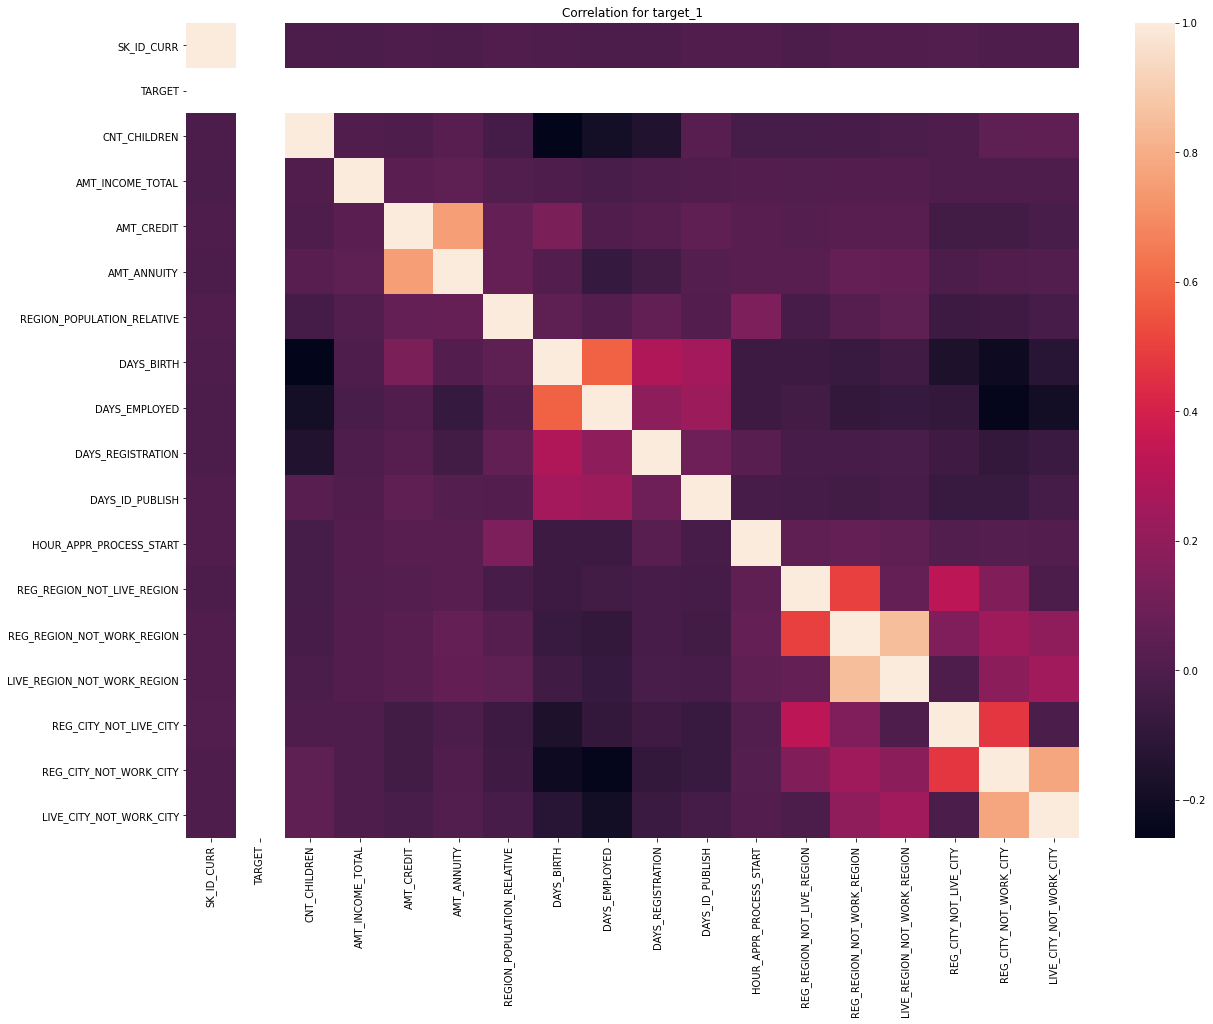

In [38]:
#Heatmap for target_1 

plt.figure(figsize=(20,15))
plt.title('Correlation for target_1')

sns.heatmap(data=target_1)
plt.show()

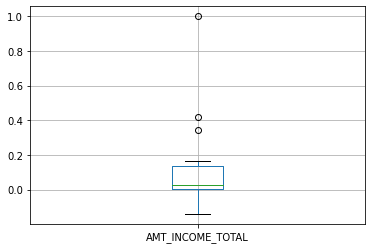

In [39]:
#Boxplot for AMT_INCOME_TOTAL for target_0

target_0.boxplot(column='AMT_INCOME_TOTAL')
plt.show()

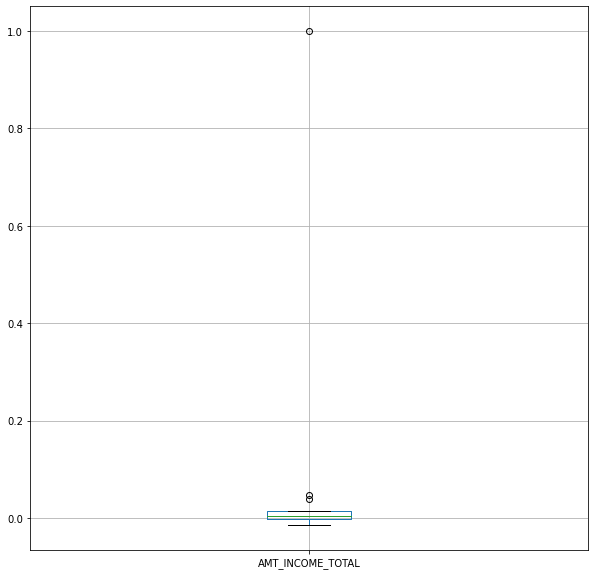

In [40]:
#Boxplot for AMT_INCOME_TOTAL for target_1

plt.figure(figsize=(10,10))
target_1.boxplot(column='AMT_INCOME_TOTAL')
plt.show()

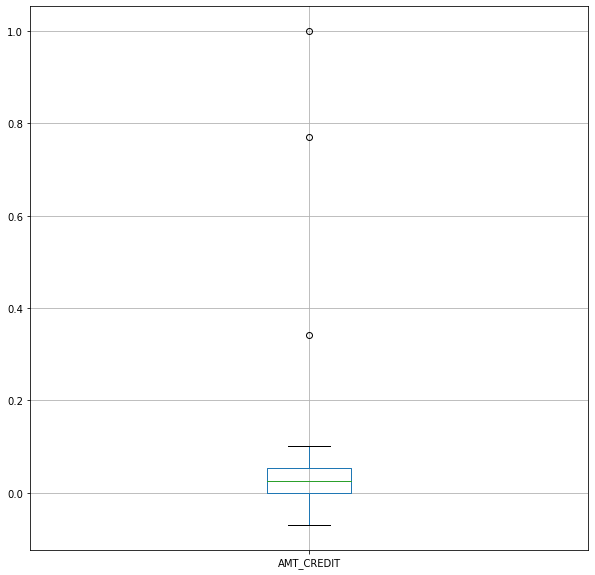

In [41]:
#Boxplot for AMT_CREDIT for target_0

plt.figure(figsize=(10,10))
target_0.boxplot(column='AMT_CREDIT')
plt.show()

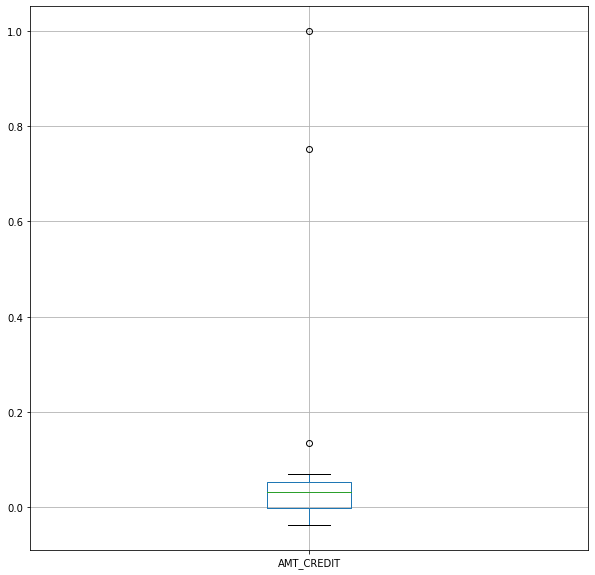

In [42]:
#Boxplot for AMT_CREDIT for target_1

plt.figure(figsize=(10,10))
target_1.boxplot(column='AMT_CREDIT')
plt.show()

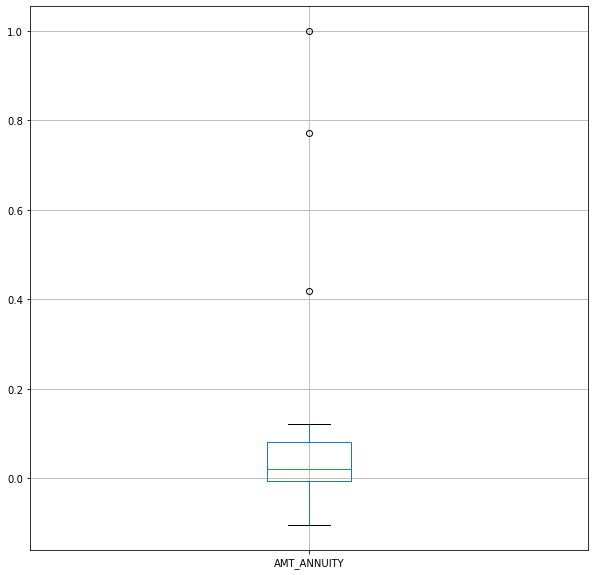

In [43]:
#Boxplot for AMT_ANNUITY for target_0

plt.figure(figsize=(10,10))
target_0.boxplot(column='AMT_ANNUITY')
plt.show()

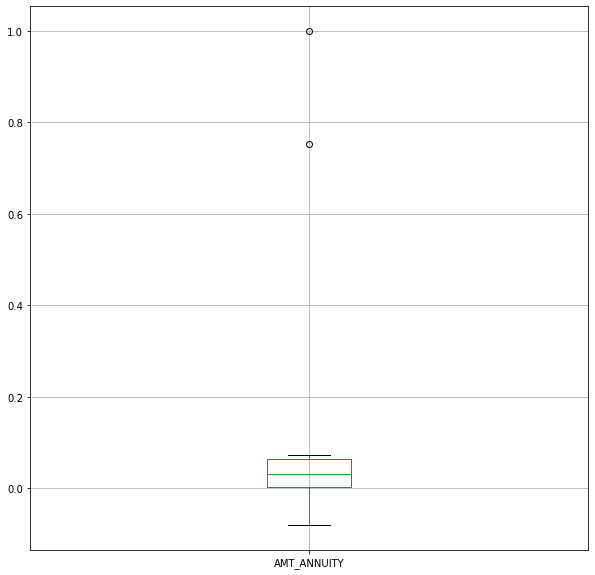

In [44]:
#Boxplot for AMT_ANNUITY for target_1

plt.figure(figsize=(10,10))
target_1.boxplot(column='AMT_ANNUITY')
plt.show()

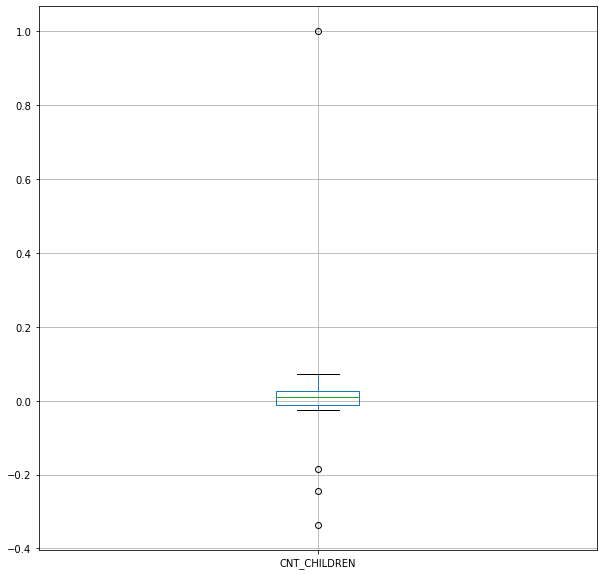

In [45]:
#Boxplot for CNT_CHILDREN for target_0

plt.figure(figsize=(10,10))
target_0.boxplot(column='CNT_CHILDREN')
plt.show()

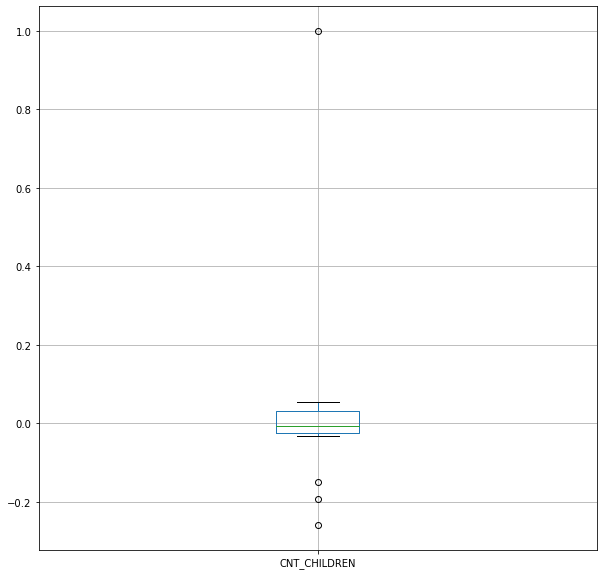

In [46]:
#Boxplot for CNT_CHILDREN for target_1


plt.figure(figsize=(10,10))
target_1.boxplot(column='CNT_CHILDREN')
plt.show()

In [47]:
#merging app dataset with  pre_app dataset

new_application = pd.merge(left=app, right=pre_app, how='inner', on='SK_ID_CURR')

In [48]:
new_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_TOTAL_Bin,AMT_CREDIT_Bin,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,medium,low,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,high,high,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,high,high,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,high,high,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,NaN,NaN,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [49]:
new_application.shape

(1413701, 66)

In [50]:
#Removing the values'XNA' and 'XAP' from the column

new_application = new_application.drop(new_application[new_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
new_application = new_application.drop(new_application[new_application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

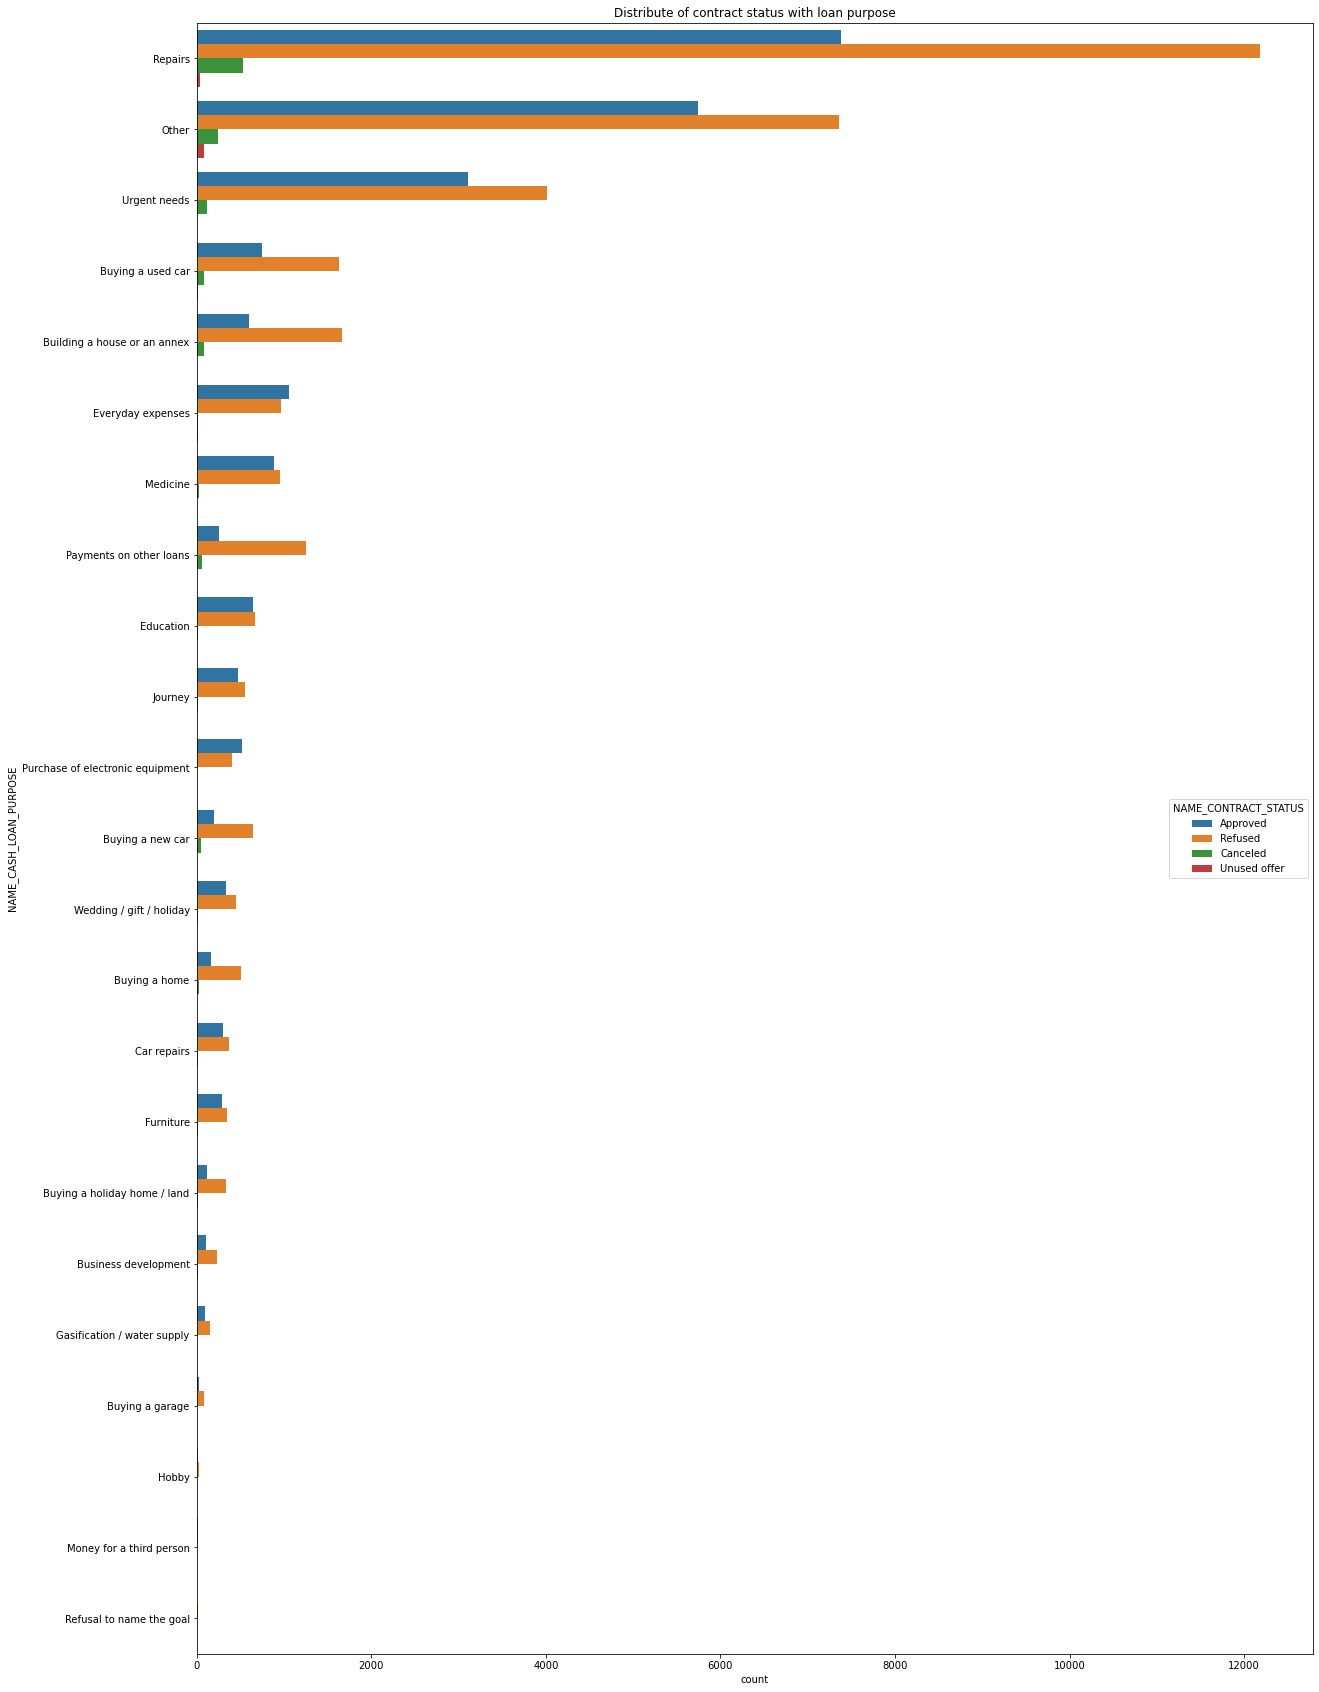

In [51]:
#Distribution of contract status

plt.figure(figsize=(20,30))
plt.title("Distribute of contract status with loan purpose")
sns.countplot(data= new_application, y='NAME_CASH_LOAN_PURPOSE', order=new_application['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='NAME_CONTRACT_STATUS')
plt.show()

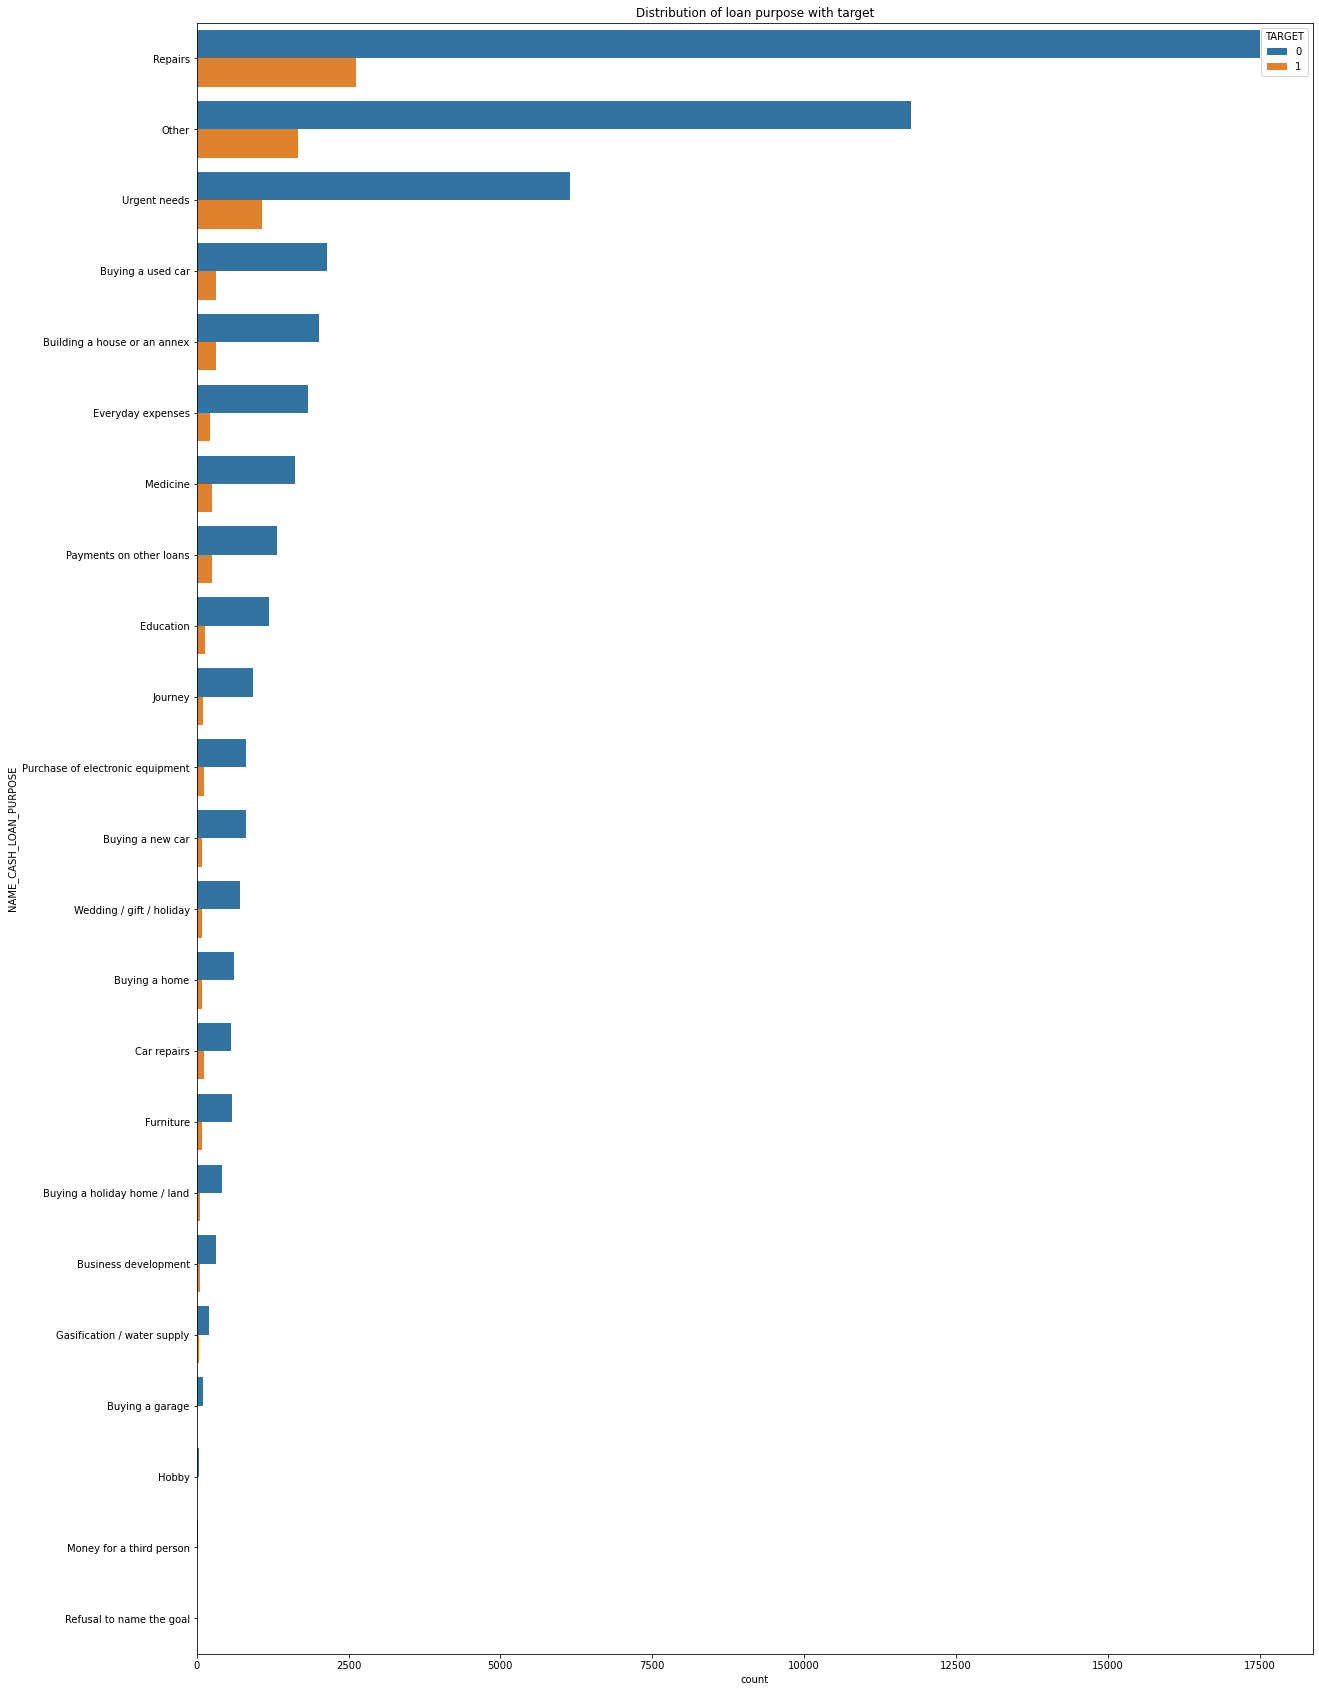

In [52]:
plt.figure(figsize=(20,30))
plt.title("Distribution of loan purpose with target")
sns.countplot(data= new_application, y='NAME_CASH_LOAN_PURPOSE', order=new_application['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='TARGET')
plt.show()

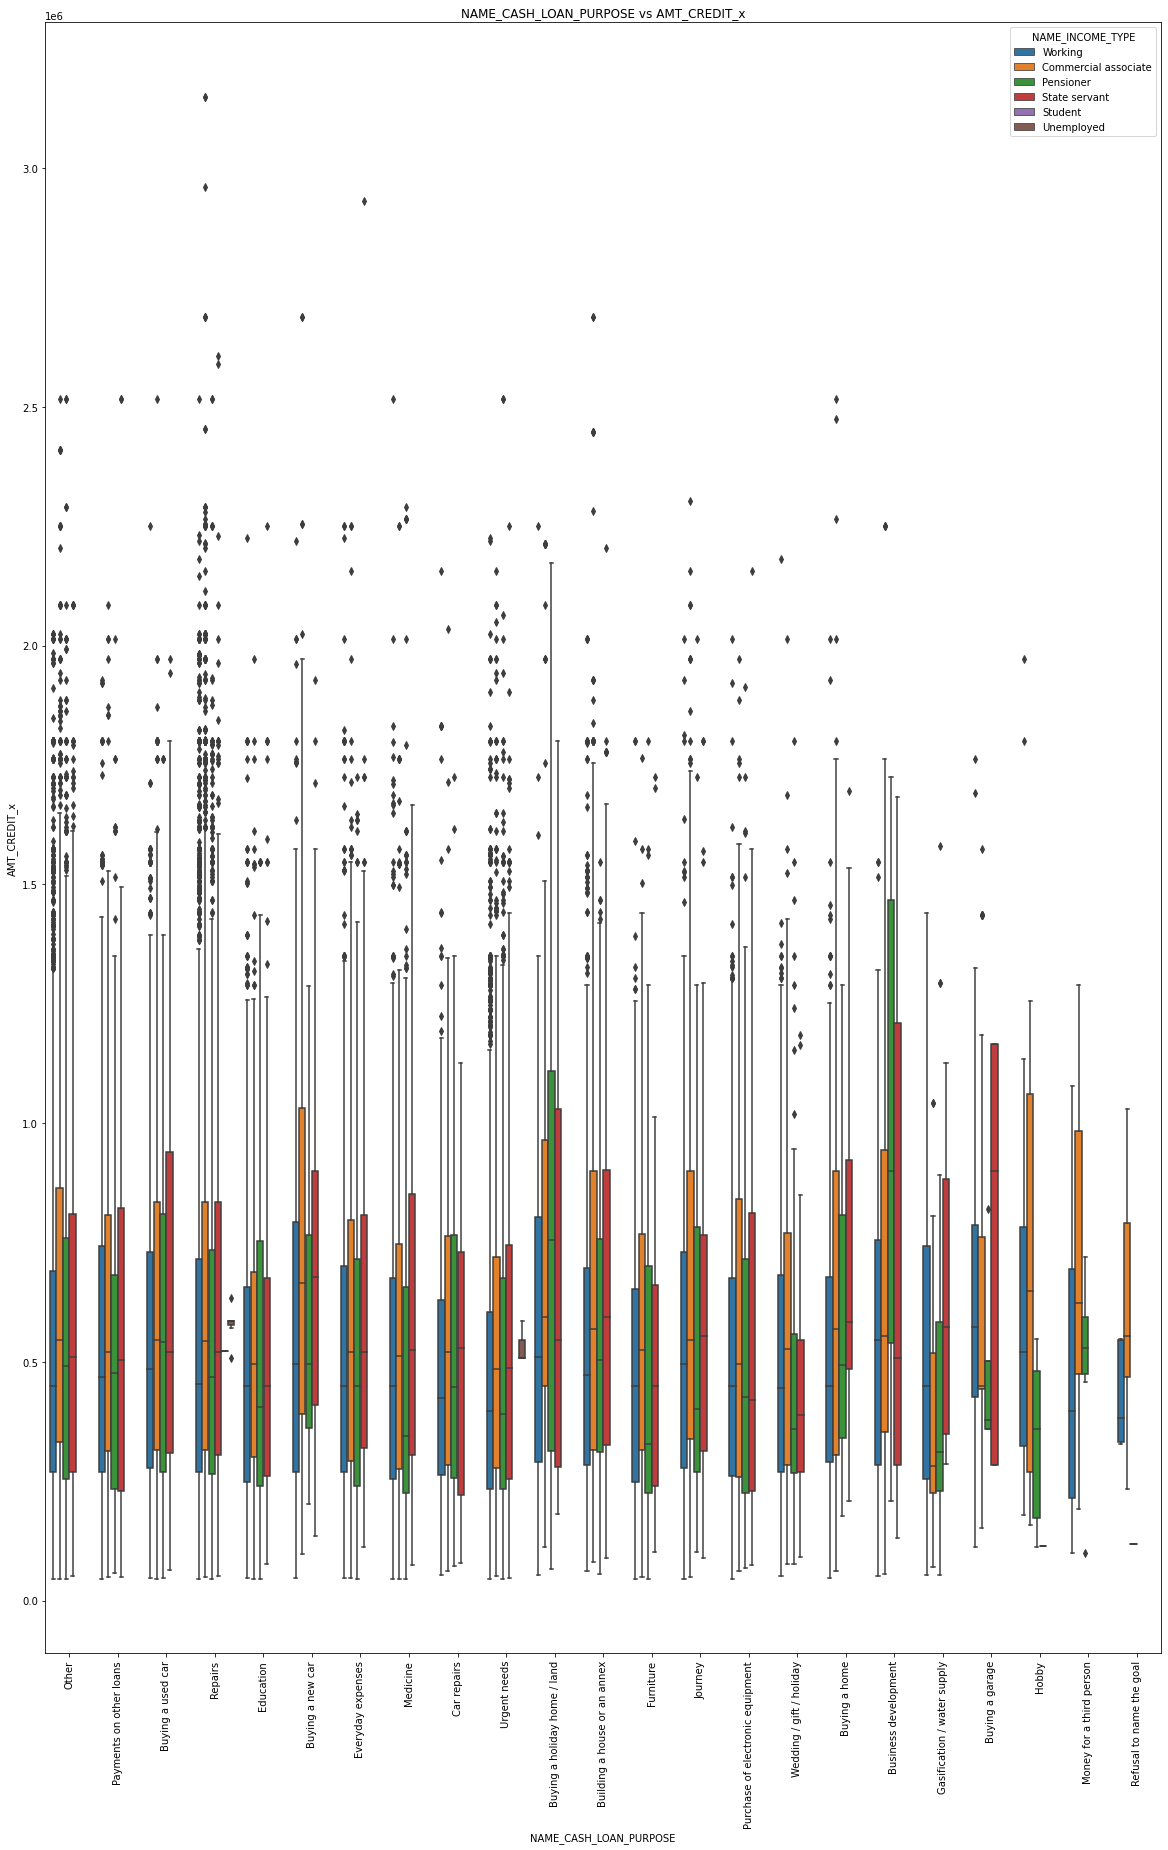

In [53]:
#Boxplot for NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT_x

plt.figure(figsize=(20,30))
plt.title('NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT_x')
plt.xticks(rotation=90)
sns.boxplot(data=new_application, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_x')
plt.show()

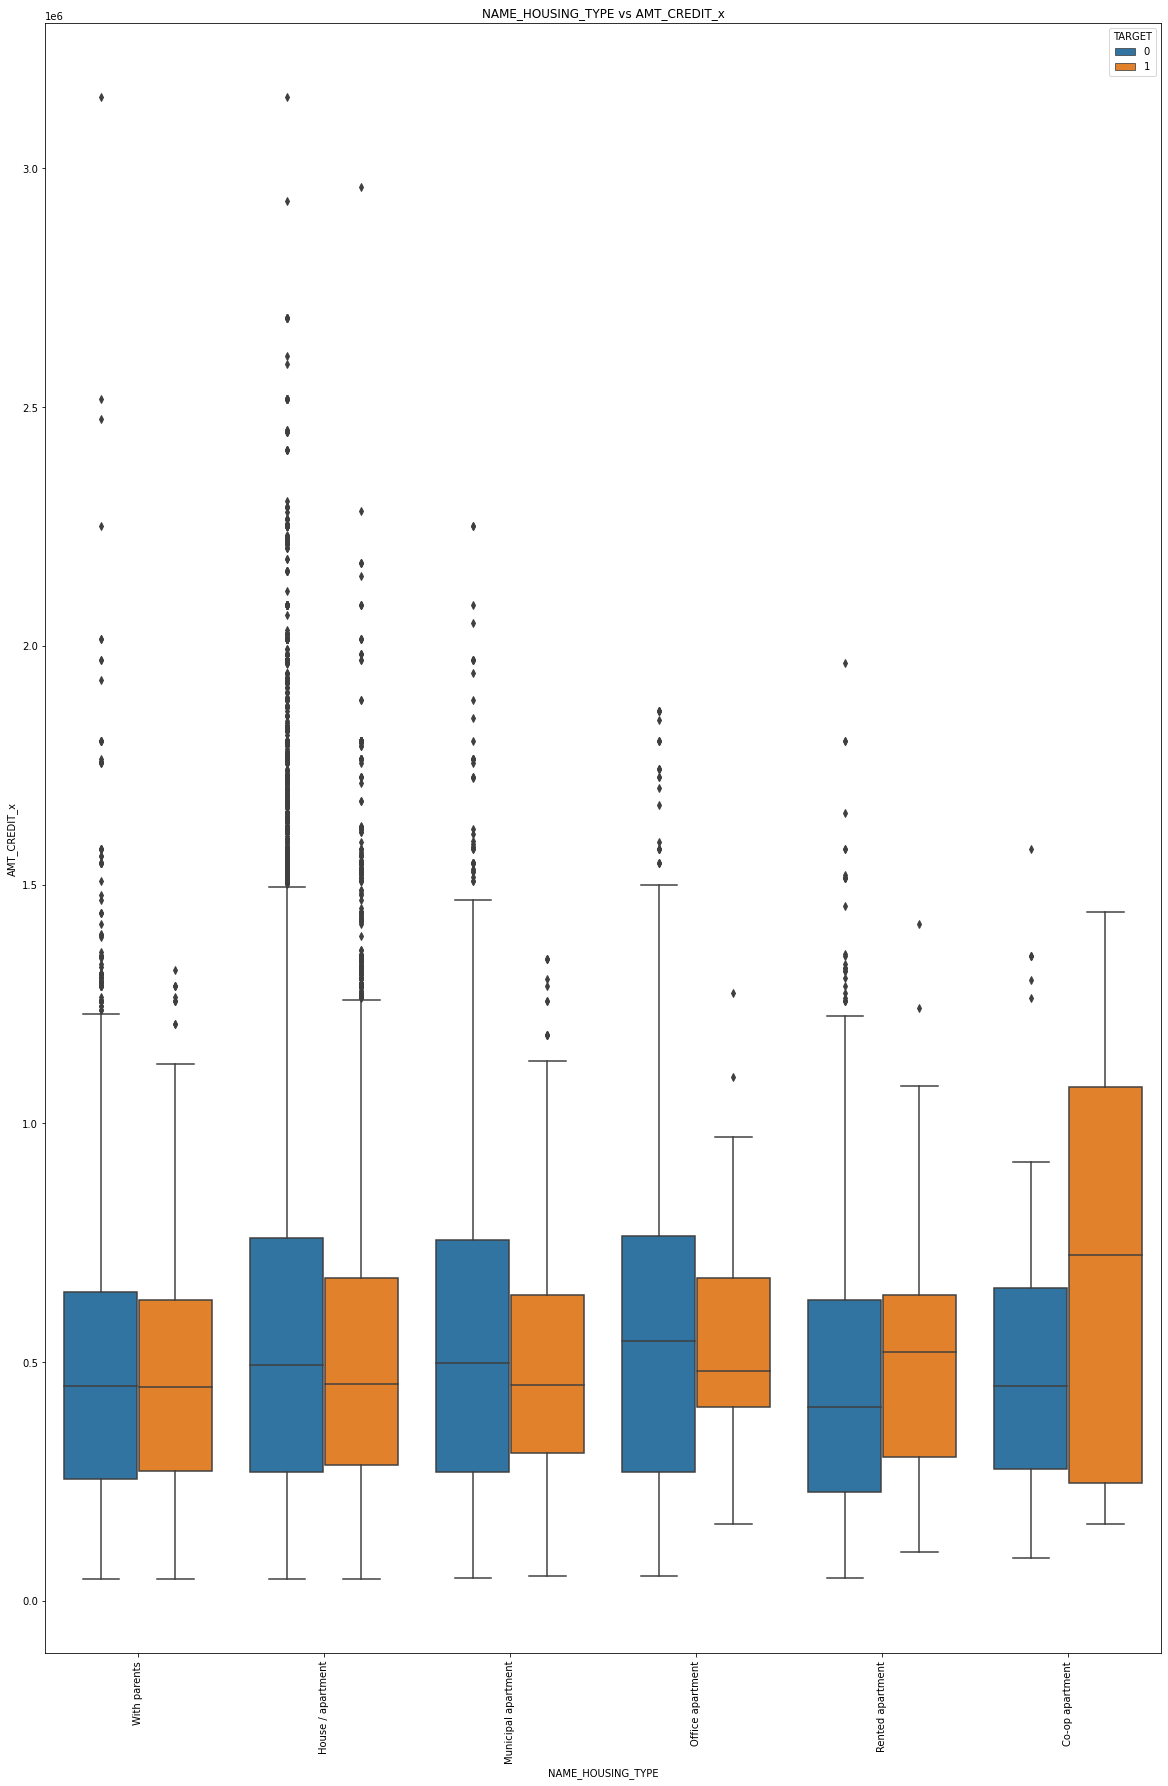

In [54]:
#Boxplot for NAME_HOUSING_TYPE vs AMT_CREDIT_x

plt.figure(figsize=(20,30))
plt.title('NAME_HOUSING_TYPE vs AMT_CREDIT_x')
plt.xticks(rotation=90)
sns.boxplot(data=new_application, x='NAME_HOUSING_TYPE', hue='TARGET', y='AMT_CREDIT_x')
plt.show()